In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from matplotlib.patches import Patch

output_path = "../data/processed/merged_df.csv"
merged_df = pd.read_csv(output_path)

merged_df.head()

,geonameid,name_x,asciiname,alternatenames,latitude,longitude,feature class,feature code,iso alpha 2,cc2,...,nearest_hdd_6,nearest_hdd_7,nearest_hdd_8,nearest_hdd_9,nearest_hdd_10,nearest_hdd_11,nearest_hdd_12,total_year,average_year,variance_year
0,292968,Abu Dhabi,Abu Dhabi,"A-pu-that-pi,AEbu Saby,AUH,Aboe Dhabi,Abou Dab...",24.45118,54.39696,P,PPLC,AE,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1138958,Kabul,Kabul,"Cabool,Caboul,Cabul,Cabura,Cabúl,Caubul,KBL,Ka...",34.52813,69.17233,P,PPLC,AF,NaN,...,44.591157,48.598879,47.044252,24.307915,21.080207,7.237953,0.484769,55.848382,9.308064,307.148068
2,3183875,Tirana,Tirana,"TIA,Terana,Theranda,Tiorana,Tiorána,Tiran,Tira...",41.32750,19.81889,P,PPLC,AL,NaN,...,50.968761,91.140628,75.642559,82.533826,49.688605,20.027416,42.496259,189.011143,31.501857,474.002253
3,616052,Yerevan,Yerevan,"Ayrivan,Djerevan,EVN,Eireavan,Eireaván,Ereban,...",40.18111,44.51361,P,PPLC,AM,NaN,...,33.763358,49.348147,32.999900,21.805311,65.960578,67.675284,36.406253,187.031386,31.171898,426.687581
4,2240449,Luanda,Luanda,"LAD,Loanda,Louanda,Louanta,Luand,Luanda,Luanda...",-8.83682,13.23432,P,PPLC,AO,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_16339/568330446.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/var/folders/9m/ym86jvl93wq3tx6ssy8ql7kh0000gn/T/ipykernel_16339/568330446.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


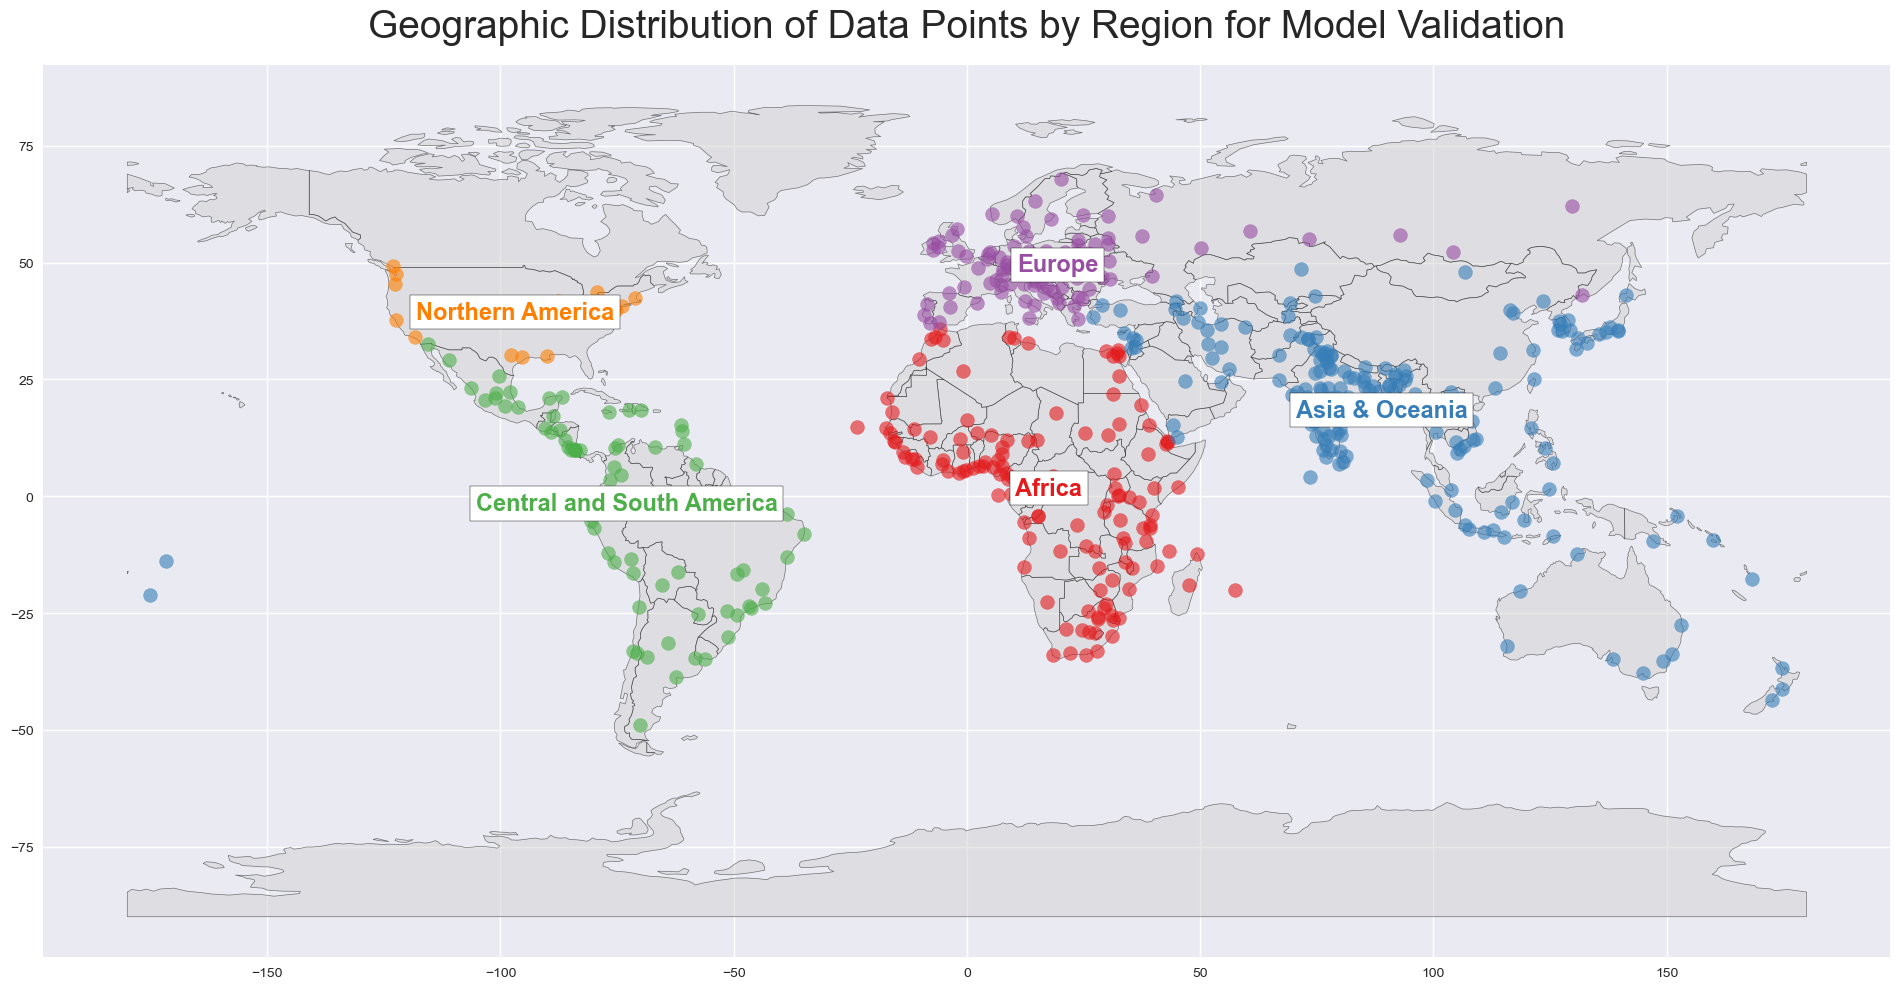

In [2]:
def create_static_region_map(merged_df):
    plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(30, 10))
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, alpha=0.5)
    
    colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', 
              '#FFFF33', '#A65628', '#F781BF', '#999999', '#66C2A5',
              '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854', '#FFD92F']
    
    unique_regions = sorted(merged_df['Region Grouped'].unique())
    color_dict = dict(zip(unique_regions, colors[:len(unique_regions)]))
    
    for region in unique_regions:
        mask = merged_df['Region Grouped'] == region
        ax.scatter(merged_df[mask]['longitude'], 
                   merged_df[mask]['latitude'],
                   c=[color_dict[region]],
                   label=region,
                   alpha=0.6,
                   s=100)
        
        mean_longitude = merged_df[mask]['longitude'].mean()
        mean_latitude = merged_df[mask]['latitude'].mean()
        
        ax.text(mean_longitude, mean_latitude, region, 
                fontsize=17, color=color_dict[region], 
                ha='center', va='center', weight='bold',
                bbox=dict(facecolor='white', alpha=1))
    
    ax.set_title('Geographic Distribution of Data Points by Region for Model Validation', fontsize=28, pad=20)
    plt.tight_layout()
    
    return fig

fig = create_static_region_map(merged_df)
plt.show()
